In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Modelagem de dados

## Importar arquivos

In [3]:
files = [file for file in os.listdir('data/raw')]

In [4]:
files

['202004-divvy-tripdata.csv',
 '202005-divvy-tripdata.csv',
 '202006-divvy-tripdata.csv',
 '202007-divvy-tripdata.csv',
 '202008-divvy-tripdata.csv',
 '202009-divvy-tripdata.csv',
 '202010-divvy-tripdata.csv',
 '202011-divvy-tripdata.csv',
 '202012-divvy-tripdata.csv',
 '202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv']

## Verificar se colunas combinam

In [5]:
file_sum = len(files)
equal_sum = 0

In [7]:
file_df1 = pd.DataFrame()
for file in files:
    file_df2 = pd.read_csv(f'data/raw/{file}')
    print(file_df2.columns.equals(file_df1.columns))
    file_df1 = file_df2
    equal_sum += 1

False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [8]:
print(file_sum == equal_sum)

True


## Criar dataframe

In [9]:
df = pd.DataFrame()

In [11]:
for file in files:
    file_df = pd.read_csv(f'data/raw/{file}')
    df = pd.concat([df, file_df])

In [12]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.7400,-87.6800,41.7500,-87.6800,member
823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.8700,-87.6600,41.8700,-87.6800,member
823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.9500,-87.6400,41.9500,-87.6500,member
823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.8800,-87.6300,41.8700,-87.6300,member


## Adicionar duração do uso

In [13]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [14]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [15]:
df['ride_duration'] = df['ended_at'] - df['started_at']

In [16]:
print(df['ride_duration'])

0        0 days 00:26:49
1        0 days 00:08:09
2        0 days 00:14:23
3        0 days 00:12:12
4        0 days 00:52:55
               ...      
823483   0 days 00:23:55
823484   0 days 00:05:12
823485   0 days 00:05:24
823486   0 days 00:05:27
823487   0 days 00:05:20
Name: ride_duration, Length: 11812079, dtype: timedelta64[ns]


In [17]:
df['ride_duration_seconds'] = df['ride_duration'].dt.total_seconds()

In [18]:
print(df['ride_duration_seconds'])

0         1609.0
1          489.0
2          863.0
3          732.0
4         3175.0
           ...  
823483    1435.0
823484     312.0
823485     324.0
823486     327.0
823487     320.0
Name: ride_duration_seconds, Length: 11812079, dtype: float64


## Adicionar distância percorrida

In [19]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [20]:
df['ride_distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

In [21]:
df['ride_distance_km']

0         3.99
1         0.98
2         2.99
3         2.14
4         9.13
          ... 
823483    1.11
823484    1.66
823485    0.83
823486    1.11
823487    0.83
Name: ride_distance_km, Length: 11812079, dtype: float64

## Adicionar dia da semana, mês, ano e hora

In [22]:
df['weekday'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year
df['hour'] = df['started_at'].dt.hour
df['month_year'] = df['started_at'].dt.to_period('M')

# Limpeza e formatação de dados

## Excluir linhas de NaN e duplicatas

In [23]:
df.dropna(how='all', inplace=True)

In [24]:
df.drop_duplicates(subset=['ride_id'], inplace=True)

## Verificar porcentagem de NaN em colunas

In [25]:
percent_missing = df.isnull().sum() / len(df)
percent_missing

ride_id                  0.000000
rideable_type            0.000000
started_at               0.000000
ended_at                 0.000000
start_station_name       0.104142
start_station_id         0.104195
end_station_name         0.112518
end_station_id           0.112557
start_lat                0.000000
start_lng                0.000000
end_lat                  0.001058
end_lng                  0.001058
member_casual            0.000000
ride_duration            0.000000
ride_duration_seconds    0.000000
ride_distance_km         0.001058
weekday                  0.000000
month                    0.000000
year                     0.000000
hour                     0.000000
month_year               0.000000
dtype: float64

Dados sobre a estação de início e de final não são confiáveis

In [26]:
df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], inplace=True)

## Excluir informações redundantes

In [28]:
df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

## Verificar tipos de dados

In [29]:
df.dtypes

ride_id                           object
rideable_type                     object
started_at                datetime64[ns]
ended_at                  datetime64[ns]
member_casual                     object
ride_duration            timedelta64[ns]
ride_duration_seconds            float64
ride_distance_km                 float64
weekday                           object
month                              int64
year                               int64
hour                               int64
month_year                     period[M]
dtype: object

## Verificar valores de dados

In [30]:
df.describe()

,ride_duration,ride_duration_seconds,ride_distance_km,month,year,hour
count,11811870,1.181187e+07,1.179938e+07,1.181187e+07,1.181187e+07,1.181187e+07
mean,0 days 00:22:55.097353424,1.375097e+03,2.196697e+00,7.034103e+00,2.020999e+03,1.429523e+01
std,0 days 03:48:46.696078875,1.372670e+04,2.022507e+00,2.419340e+00,7.254775e-01,4.928974e+00
min,-21 days +19:50:02,-1.742998e+06,0.000000e+00,1.000000e+00,2.020000e+03,0.000000e+00
25%,0 days 00:06:51,4.110000e+02,8.800000e-01,5.000000e+00,2.020000e+03,1.100000e+01
50%,0 days 00:12:22,7.420000e+02,1.650000e+00,7.000000e+00,2.021000e+03,1.500000e+01
75%,0 days 00:22:43,1.363000e+03,2.930000e+00,9.000000e+00,2.022000e+03,1.800000e+01
max,40 days 18:40:02,3.523202e+06,1.189520e+03,1.200000e+01,2.022000e+03,2.300000e+01


In [31]:
invalid_rides = df.loc[df['ride_duration'] <= pd.Timedelta(0, unit='s')].index

In [32]:
df.drop(index=invalid_rides, inplace=True)

# Análise exploratória

In [33]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,ride_duration_seconds,ride_distance_km,weekday,month,year,hour,month_year
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,0 days 00:26:49,1609.0,3.99,Sunday,4,2020,17,2020-04
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,0 days 00:08:09,489.0,0.98,Friday,4,2020,17,2020-04
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,0 days 00:14:23,863.0,2.99,Wednesday,4,2020,17,2020-04
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,0 days 00:12:12,732.0,2.14,Tuesday,4,2020,12,2020-04
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,0 days 00:52:55,3175.0,9.13,Saturday,4,2020,10,2020-04


## Por tipo de usuário

In [34]:
df.value_counts(['member_casual'], normalize=True)

member_casual
member           0.562812
casual           0.437188
dtype: float64

In [35]:
user_type = df.groupby(['member_casual'])

In [36]:
user_type['ride_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,5068943,0 days 00:35:08.180783646,0 days 04:58:02.383289235,0 days 00:00:01,0 days 00:09:18,0 days 00:16:42,0 days 00:30:58,38 days 20:24:09
member,6525484,0 days 00:14:12.727343596,0 days 00:56:35.581092291,0 days 00:00:01,0 days 00:05:43,0 days 00:09:59,0 days 00:17:27,40 days 18:40:02


In [37]:
user_type['ride_distance_km'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,5060461.0,2.234027,2.156772,0.0,0.87,1.71,3.01,1189.52
member,6521690.0,2.168460,1.913066,0.0,0.89,1.60,2.87,48.37


Apesar das distâncias médias percorridas serem similares entre membros e usuários casuais, o tempo médio de uso é maior do que o dobre entre usuários casuais quando comparado aos membros. Sugerindo que usuários casuais usam os veículos para lazer e com menos frequência, enquanto usuários membros usam com mais frequência e por menos tempo.

## Por mês e tipo de usuário

In [38]:
mensal = df.groupby(['month_year', 'member_casual']).agg({'ride_id':'count', 'ride_distance_km':'mean', 'ride_duration':'mean'})

In [39]:
mensal.reset_index(inplace=True)

In [40]:
mensal.rename(columns={'ride_id':'ride_count'}, inplace=True)

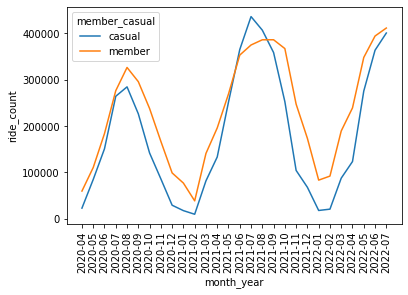

In [41]:
sns.lineplot(x=mensal['month_year'].astype(str), y='ride_count', data=mensal, hue='member_casual')
plt.xticks(rotation=90)
plt.show()

Picos de uso entre junho e outubro, meses com temperaturas mais altas em Chicago.
Menores usos entre novembro e abril, meses com temperaturas mais baixas.
Nos meses com baixas temperaturas, membros usam mais do que usuários casuais.

## Por dia da semana e tipo de usuário

In [42]:
dia_da_semana = df.groupby(['weekday', 'member_casual']).agg({'ride_id':'count', 'ride_distance_km':'mean', 'ride_duration':'mean'})

In [43]:
dia_da_semana.reset_index(inplace=True)

In [44]:
dia_da_semana.rename(columns={'ride_id':'ride_count'}, inplace=True)

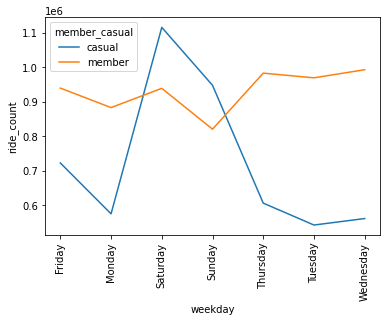

In [45]:
sns.lineplot(x=dia_da_semana['weekday'], y='ride_count', data=dia_da_semana, hue='member_casual')
plt.xticks(rotation=90)
plt.show()

Membros tem uso bastante constante durante a semana, com queda no domingo.
Usuários casuais utilizam mais aos finais de semana.

## Por hora do dia e tipo de usuário

In [46]:
hora = df.groupby(['hour', 'member_casual']).agg({'ride_id':'count', 'ride_distance_km':'mean', 'ride_duration':'mean'})

In [47]:
hora.reset_index(inplace=True)

In [48]:
hora.rename(columns={'ride_id':'ride_count'}, inplace=True)

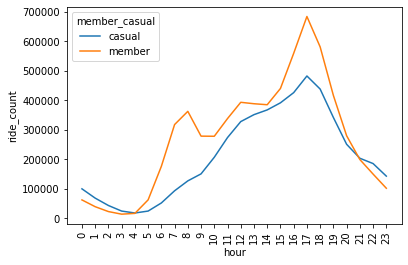

In [49]:
sns.lineplot(x=hora['hour'].astype(str), y='ride_count', data=hora, hue='member_casual')
plt.xticks(rotation=90)
plt.show()

Membros utilizam mais nos horários de ida e volta do trabalho

## Por dia da semana, hora do dia e tipo de usuário

In [50]:
dia_hora = df.groupby(['weekday', 'hour', 'member_casual']).agg({'ride_id':'count', 'ride_distance_km':'mean', 'ride_duration':'mean'})

In [51]:
dia_hora.reset_index(inplace=True)

In [52]:
dia_hora.rename(columns={'ride_id':'ride_count'}, inplace=True)

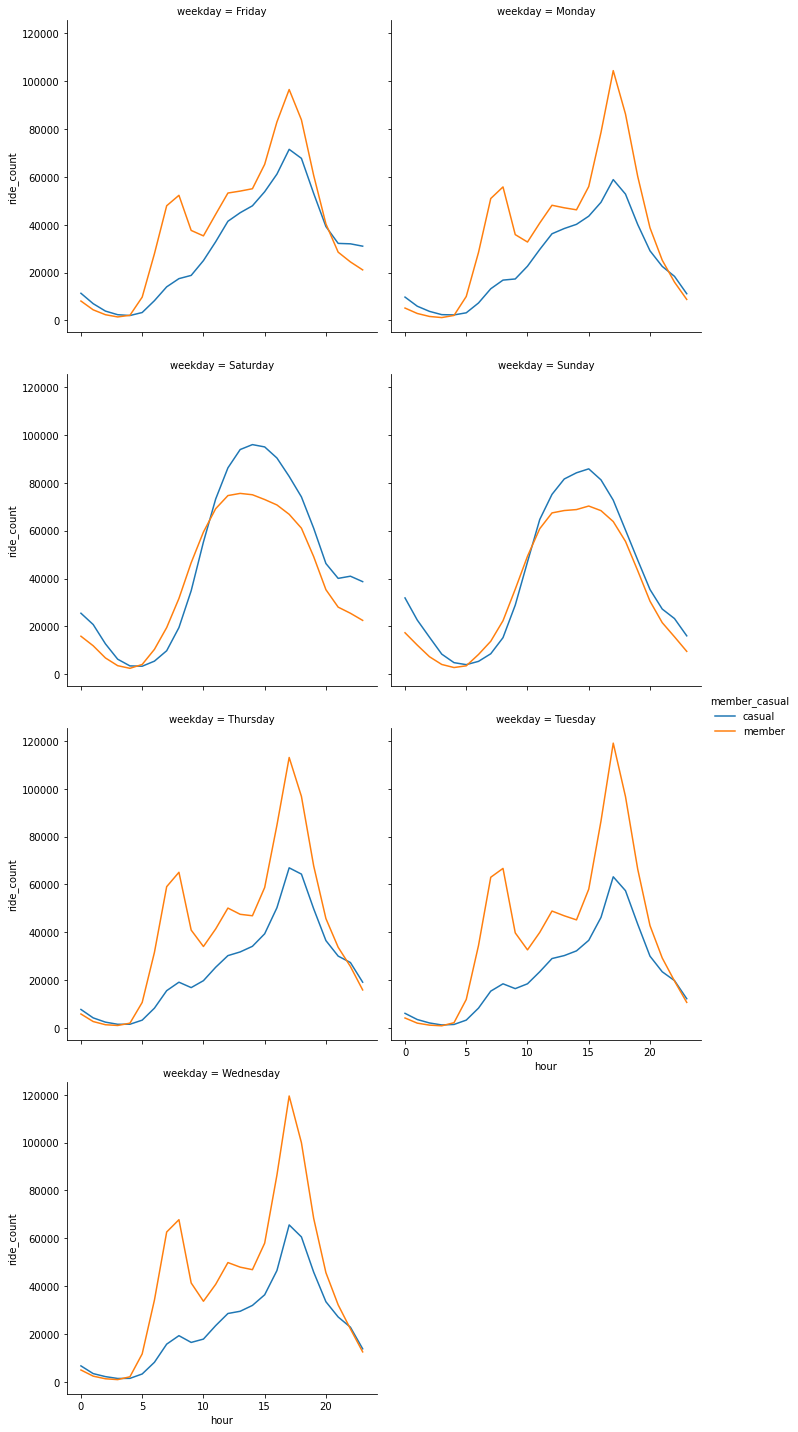

In [53]:
sns.relplot(x='hour', y='ride_count', data=dia_hora, kind='line', hue='member_casual', col='weekday', col_wrap=2)
plt.show()

Nos finais de semana usuários casuais usam mais do que membros durante a tarde

## Por tipo de veículo e tipo de usuário

In [54]:
veiculo = df.groupby(['rideable_type', 'member_casual']).agg({'ride_id':'count', 'ride_distance_km':'mean', 'ride_duration':'mean'})

In [55]:
veiculo.reset_index(inplace=True)

In [56]:
veiculo.rename(columns={'ride_id':'ride_count'}, inplace=True)

In [59]:
veiculo['ride_count_perc(%)'] = np.nan

In [60]:
sum_member = veiculo.loc[veiculo['member_casual']=='member']['ride_count'].sum()

In [61]:
veiculo.loc[veiculo['member_casual']=='member', 'ride_count_perc(%)'] = veiculo.loc[veiculo['member_casual']=='member']['ride_count'] / sum_member

In [62]:
sum_casual = veiculo.loc[veiculo['member_casual']=='casual']['ride_count'].sum()

In [63]:
veiculo.loc[veiculo['member_casual']=='casual', 'ride_count_perc(%)'] = veiculo.loc[veiculo['member_casual']=='casual']['ride_count'] / sum_casual

In [64]:
veiculo

,rideable_type,member_casual,ride_count,ride_distance_km,ride_duration,ride_count_perc(%)
0,classic_bike,casual,1796330,2.125222,0 days 00:29:14.671221880,0.354380
1,classic_bike,member,2956429,1.988892,0 days 00:14:06.894694240,0.453059
2,docked_bike,casual,1490981,2.108583,0 days 01:01:12.783171616,0.294140
3,docked_bike,member,1409288,2.267545,0 days 00:17:08.267598957,0.215967
4,electric_bike,casual,1781632,2.448155,0 days 00:19:15.249649759,0.351480
5,electric_bike,member,2159767,2.349571,0 days 00:12:26.168181567,0.330974


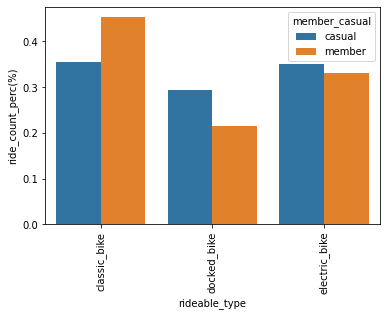

In [65]:
sns.barplot(x=veiculo['rideable_type'].astype(str), y='ride_count_perc(%)', data=veiculo, hue='member_casual')
plt.xticks(rotation=90)
plt.show()

Usuários casuais proporcionalmente usam mais bicicletas elétricas e bicicletas das estações do que membros.

# Export data

In [66]:
df.to_csv('data/clean.csv')

# TL;DR

- Usuários casuais usam mais nos meses de verão e finais de semana durante à tarde, sugerindo que alugam bicicleta para fins de lazer.

- Membros usam mais nos dias úteis e nos horários de ida e volta do trabalho/faculdade e afins, eles continuam usando mesmo durante o inverno

- Nos dias úteis usuários casuais usam mais no final da tarde

- Usuários casuais são mais propensos a usar bicicletas elétricas quando comparados a membros

# Como converter usuários casuais em membros?

- Criar campanhas para aumentar a conversão durante o verão e finais de semana, quando usuários casuais são mais ativos

- Criar campanhas para promover os benefícios da atividade física diária, sugerindo que usuários casuais incorporem mais atividade física no dia a dia indo e/ou voltando do trabalho de bicicleta

- Criar campanhas para promover uso no inverno